In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "trentino-alto adige"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,30.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,25.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2020-12-21T17:00:00,4,Trentino-Alto Adige,561,71,632,10787,11419,-1847,102,...,15.0,1717.0,401.0,-1859.0,11.23,5.53,5.94,25.44,2.90,-13.92
301,2020-12-22T17:00:00,4,Trentino-Alto Adige,540,72,612,10746,11358,-61,238,...,19.0,2353.0,652.0,-41.0,11.76,5.39,10.11,36.50,1.41,-0.53
302,2020-12-23T17:00:00,4,Trentino-Alto Adige,516,66,582,10298,10880,-478,288,...,11.0,5587.0,1112.0,-448.0,11.34,5.35,5.15,25.90,-8.33,-4.21
303,2020-12-24T17:00:00,4,Trentino-Alto Adige,483,66,549,10304,10853,-27,380,...,14.0,4451.0,905.0,6.0,12.02,5.06,8.54,41.99,0.00,-0.25


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 336
Nuovi tamponi: 5001.0
Percentuale nuovi positivi/nuovi tamponi: 6.7 %
Nuovi guariti: -1164.0
Nuovi deceduti: 12.0
Variazione positivi ricoverati con sintomi: -30.0
Variazione positivi in terapia intensiva: 2.0
Variazione positivi in isolamento dimiciliare: 1516.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-26T17:00:00,4,Trentino-Alto Adige,233,17,250,4691,4941,422,434,...,4.0,3497.0,1410.0,406.0,6.80,5.06,12.41,30.78,13.33,9.34
1,2020-10-27T17:00:00,4,Trentino-Alto Adige,253,17,270,5116,5386,445,499,...,2.0,3117.0,1506.0,425.0,6.30,5.01,16.01,33.13,0.00,9.01
2,2020-10-28T17:00:00,4,Trentino-Alto Adige,275,21,296,5392,5688,302,381,...,9.0,4850.0,1294.0,276.0,7.09,5.20,7.86,29.44,23.53,5.61
3,2020-10-29T17:00:00,4,Trentino-Alto Adige,302,24,326,5512,5838,150,471,...,5.0,5669.0,1652.0,120.0,7.36,5.58,8.31,28.51,14.29,2.64
4,2020-10-30T17:00:00,4,Trentino-Alto Adige,351,27,378,5872,6250,412,572,...,4.0,5384.0,1744.0,360.0,7.14,6.05,10.62,32.80,12.50,7.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-21T17:00:00,4,Trentino-Alto Adige,561,71,632,10787,11419,-1847,102,...,15.0,1717.0,401.0,-1859.0,11.23,5.53,5.94,25.44,2.90,-13.92
57,2020-12-22T17:00:00,4,Trentino-Alto Adige,540,72,612,10746,11358,-61,238,...,19.0,2353.0,652.0,-41.0,11.76,5.39,10.11,36.50,1.41,-0.53
58,2020-12-23T17:00:00,4,Trentino-Alto Adige,516,66,582,10298,10880,-478,288,...,11.0,5587.0,1112.0,-448.0,11.34,5.35,5.15,25.90,-8.33,-4.21
59,2020-12-24T17:00:00,4,Trentino-Alto Adige,483,66,549,10304,10853,-27,380,...,14.0,4451.0,905.0,6.0,12.02,5.06,8.54,41.99,0.00,-0.25


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

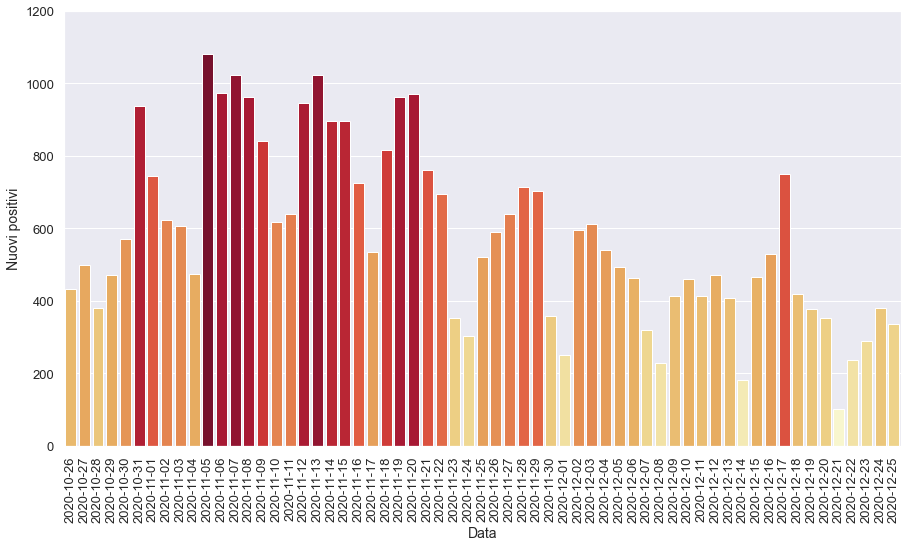

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

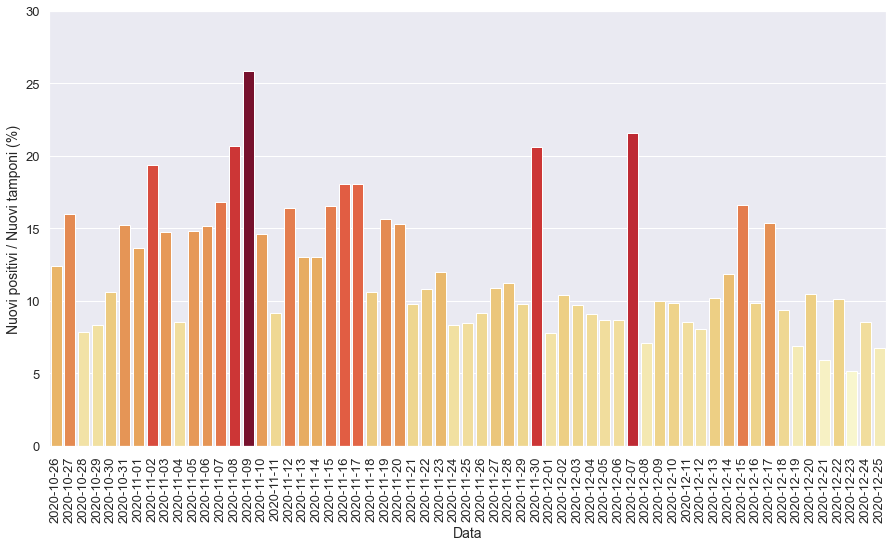

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

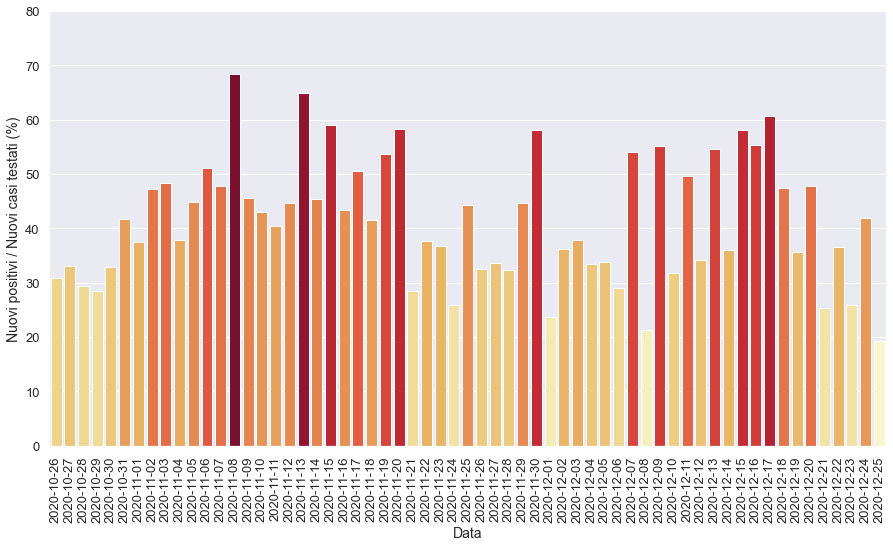

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

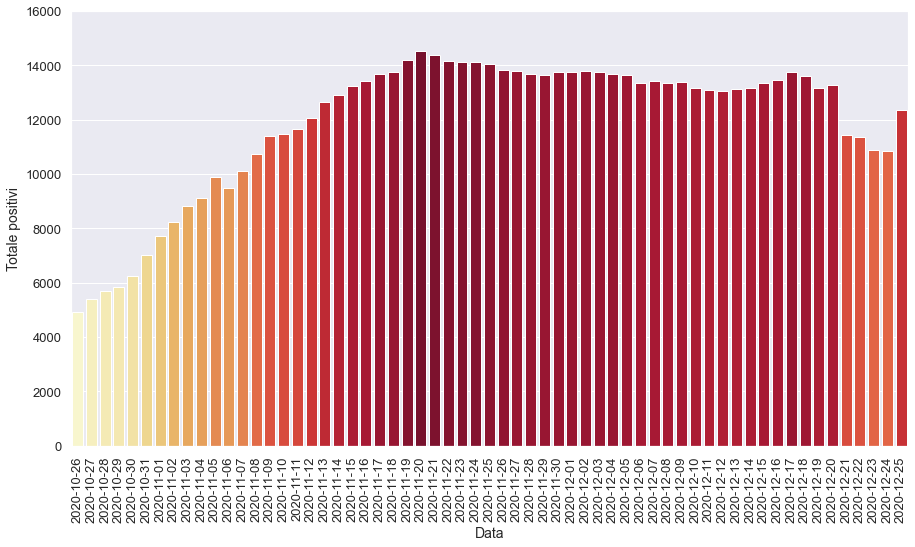

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

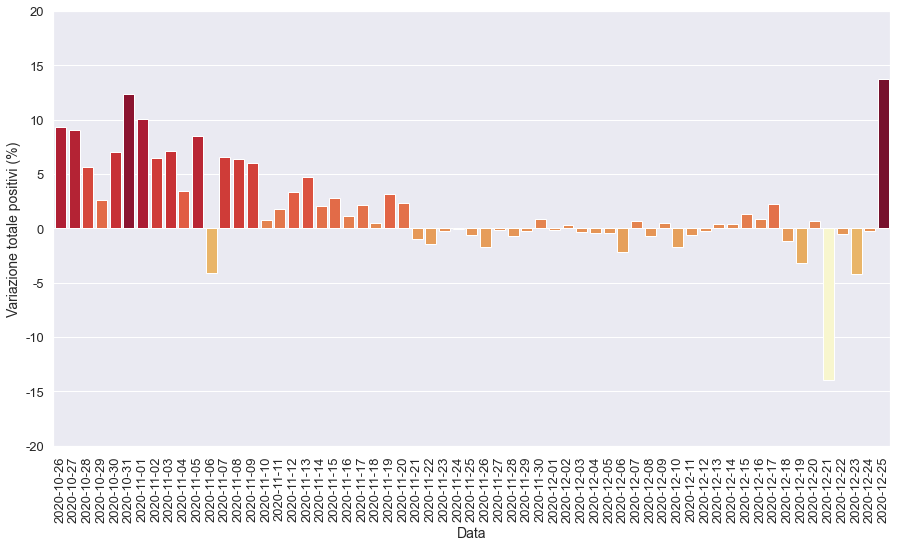

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

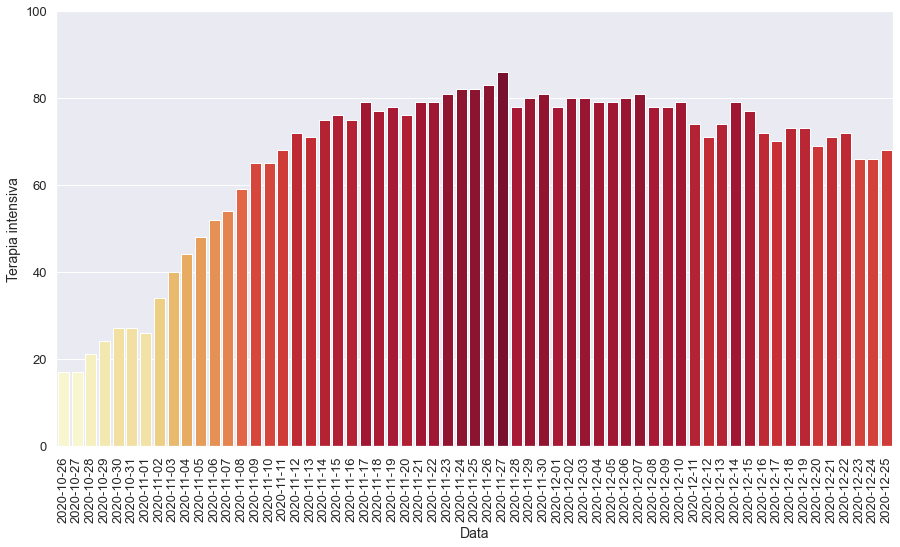

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

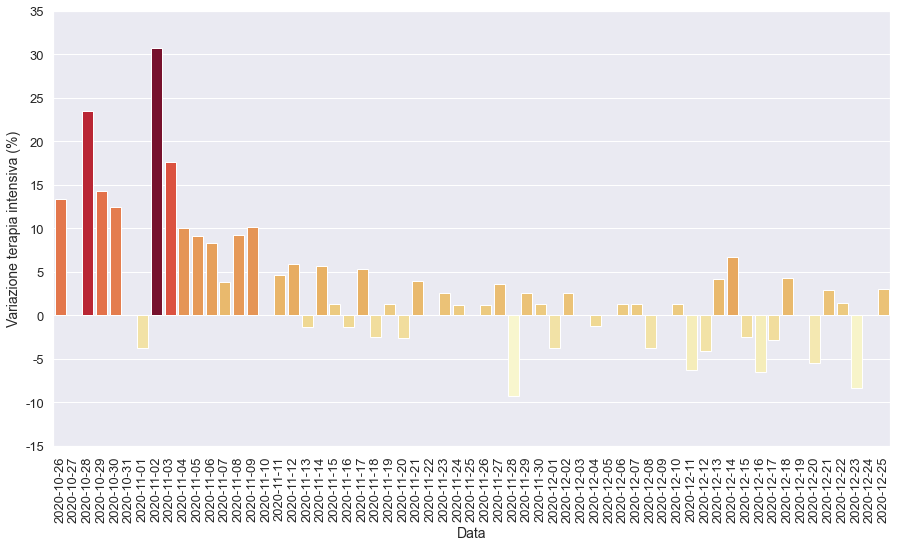

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

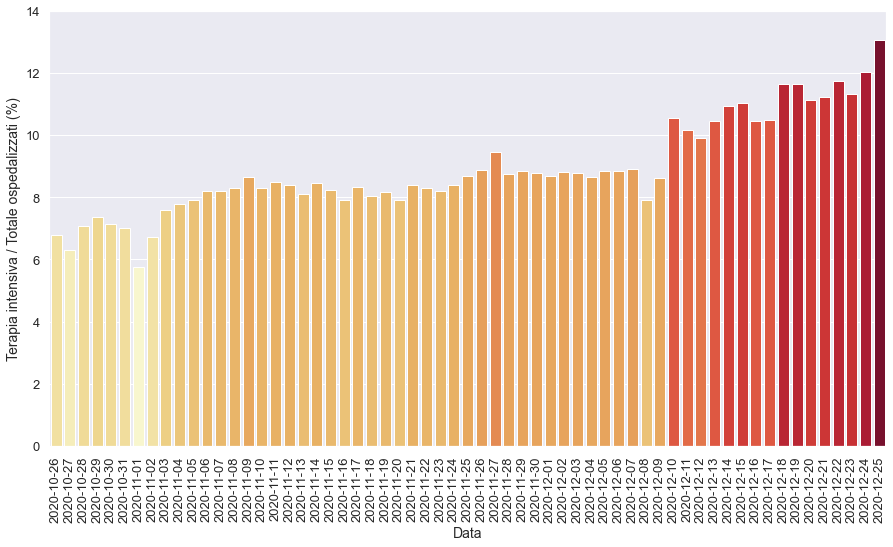

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

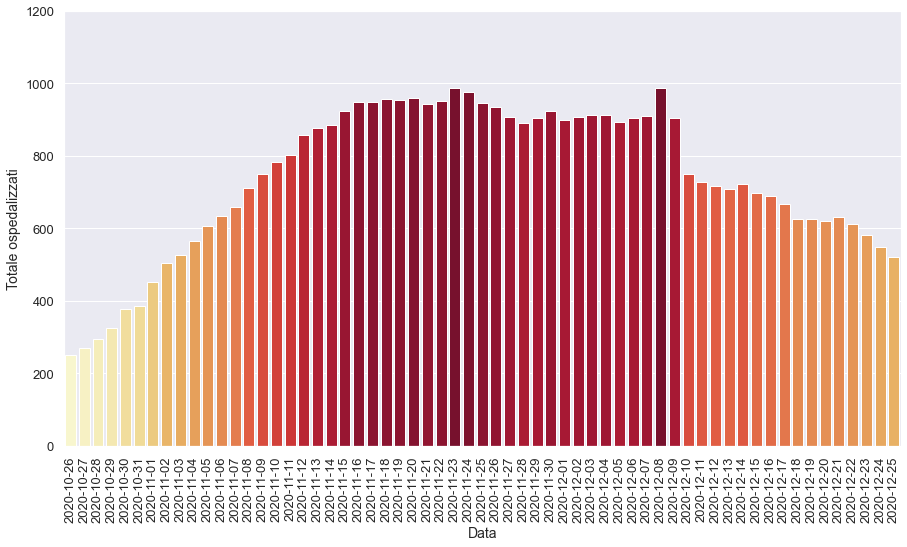

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

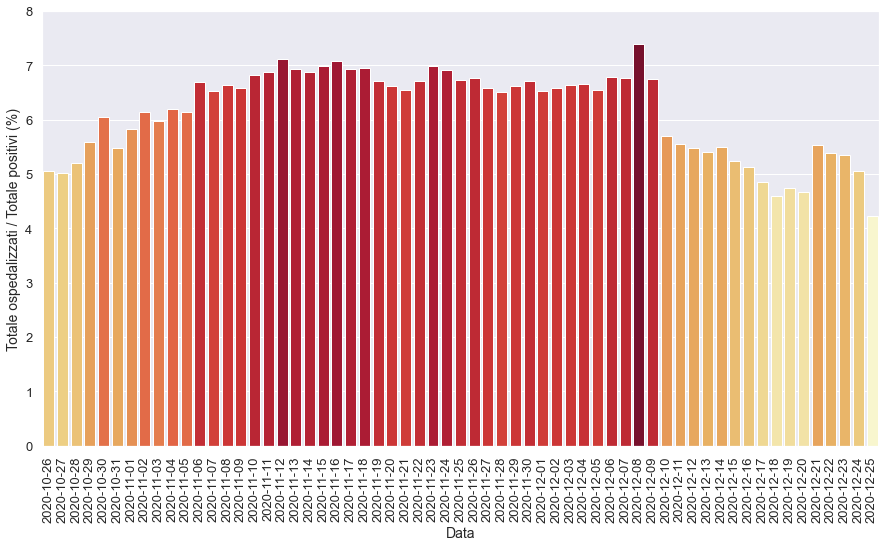

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

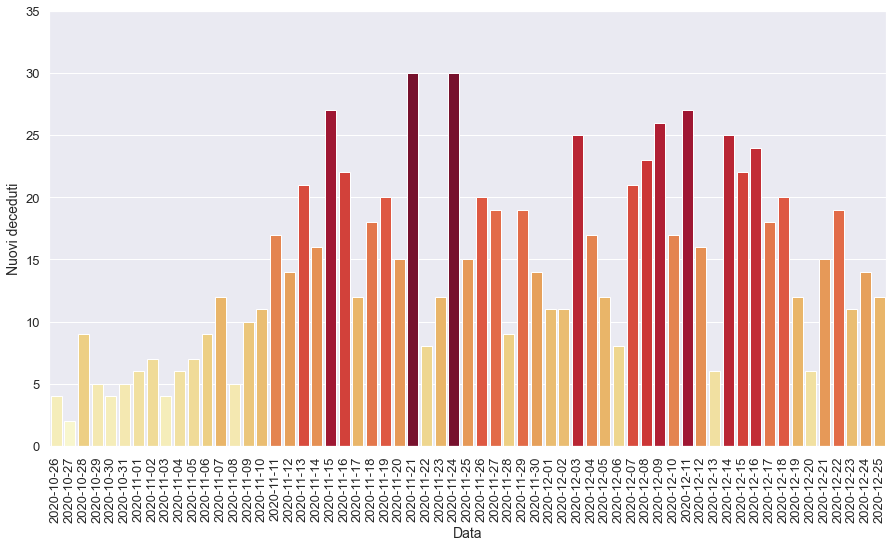

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

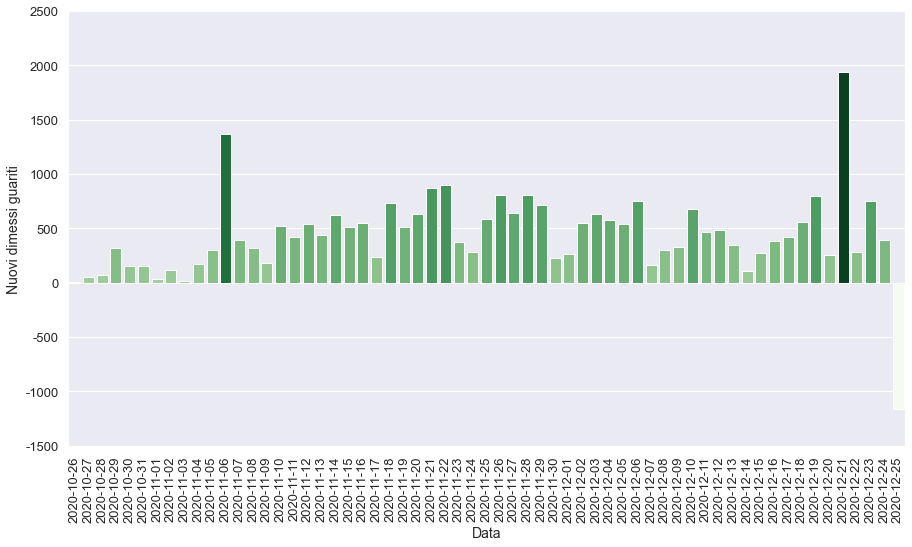

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-25T17:00:00,4,Trentino-Alto Adige,863,82,945,13102,14047,-81,520,...,15.0,6135.0,1176.0,-49.0,8.68,6.73,8.48,44.22,0.00,-0.57
1,2020-11-26T17:00:00,4,Trentino-Alto Adige,851,83,934,12878,13812,-235,589,...,20.0,6425.0,1807.0,-224.0,8.89,6.76,9.17,32.60,1.22,-1.67
2,2020-11-27T17:00:00,4,Trentino-Alto Adige,822,86,908,12884,13792,-20,639,...,19.0,5855.0,1903.0,6.0,9.47,6.58,10.91,33.58,3.61,-0.14
3,2020-11-28T17:00:00,4,Trentino-Alto Adige,813,78,891,12800,13691,-101,713,...,9.0,6342.0,2208.0,-84.0,8.75,6.51,11.24,32.29,-9.30,-0.73
4,2020-11-29T17:00:00,4,Trentino-Alto Adige,824,80,904,12752,13656,-35,702,...,19.0,7177.0,1569.0,-48.0,8.85,6.62,9.78,44.74,2.56,-0.26
5,2020-11-30T17:00:00,4,Trentino-Alto Adige,843,81,924,12846,13770,114,359,...,14.0,1739.0,617.0,94.0,8.77,6.71,20.64,58.18,1.25,0.83
6,2020-12-01T17:00:00,4,Trentino-Alto Adige,820,78,898,12851,13749,-21,250,...,11.0,3210.0,1054.0,5.0,8.69,6.53,7.79,23.72,-3.70,-0.15
7,2020-12-02T17:00:00,4,Trentino-Alto Adige,828,80,908,12880,13788,39,595,...,11.0,5716.0,1641.0,29.0,8.81,6.59,10.41,36.26,2.56,0.28
8,2020-12-03T17:00:00,4,Trentino-Alto Adige,832,80,912,12835,13747,-41,613,...,25.0,6293.0,1619.0,-45.0,8.77,6.63,9.74,37.86,0.00,-0.30
9,2020-12-04T17:00:00,4,Trentino-Alto Adige,833,79,912,12780,13692,-55,540,...,17.0,5940.0,1611.0,-55.0,8.66,6.66,9.09,33.52,-1.25,-0.40


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

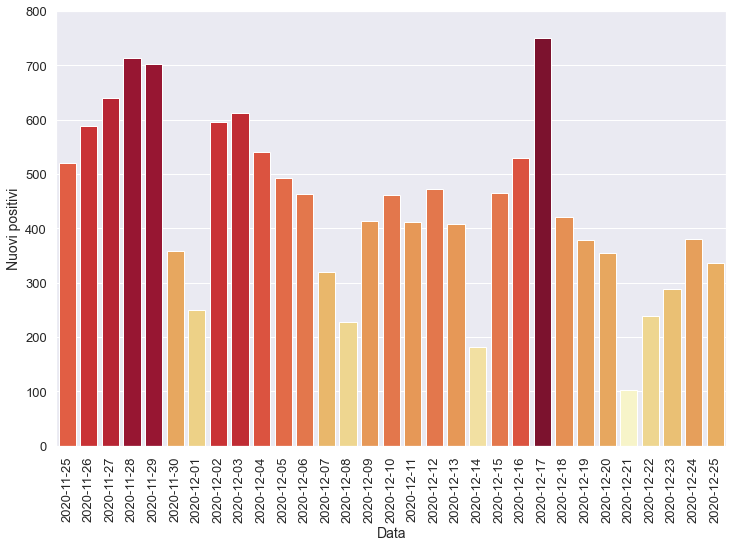

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

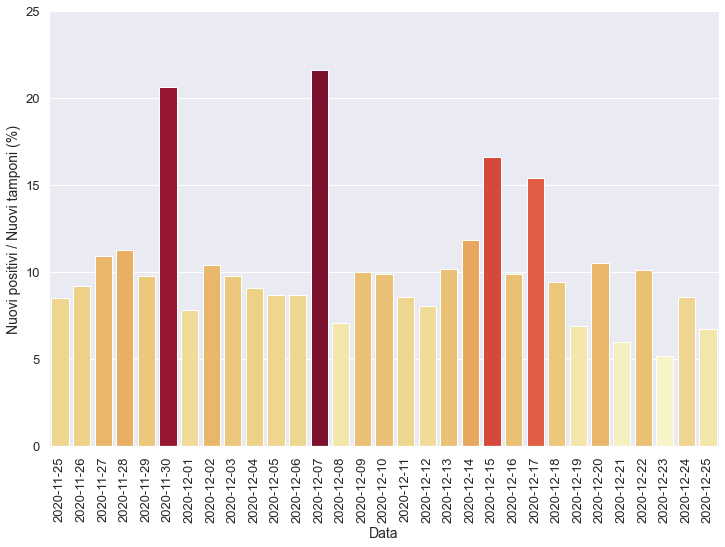

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

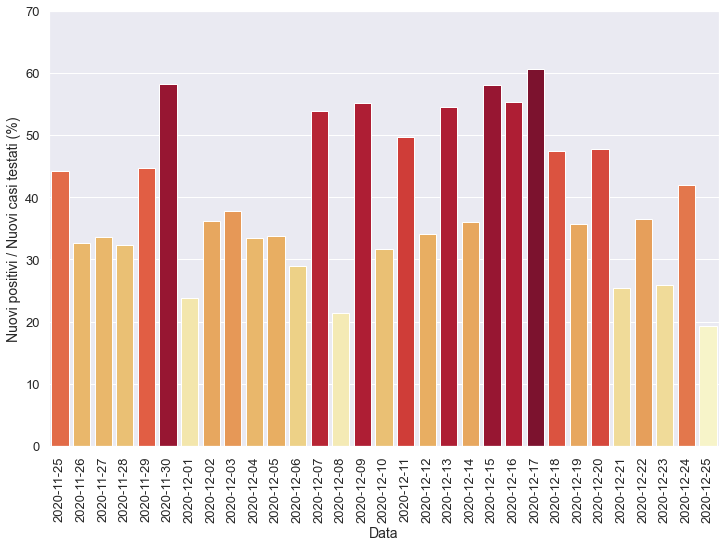

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

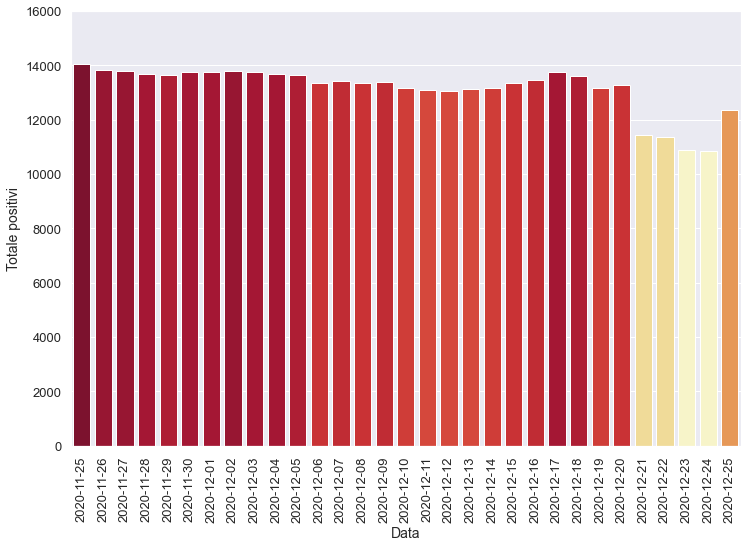

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

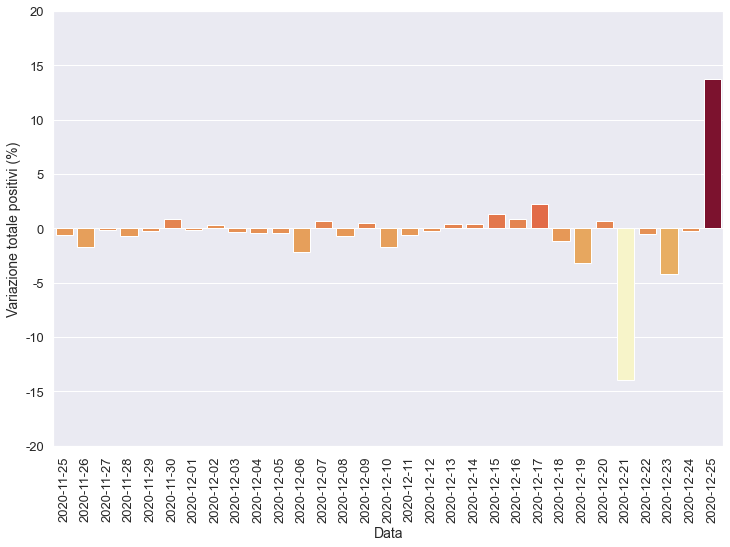

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

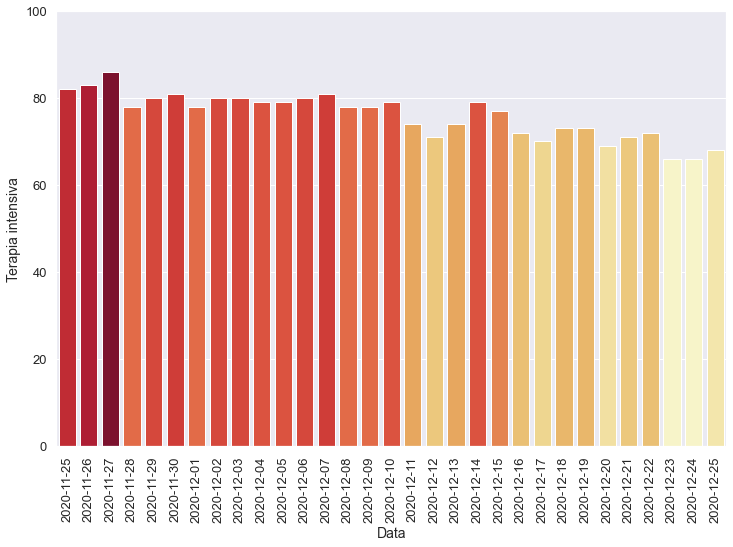

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

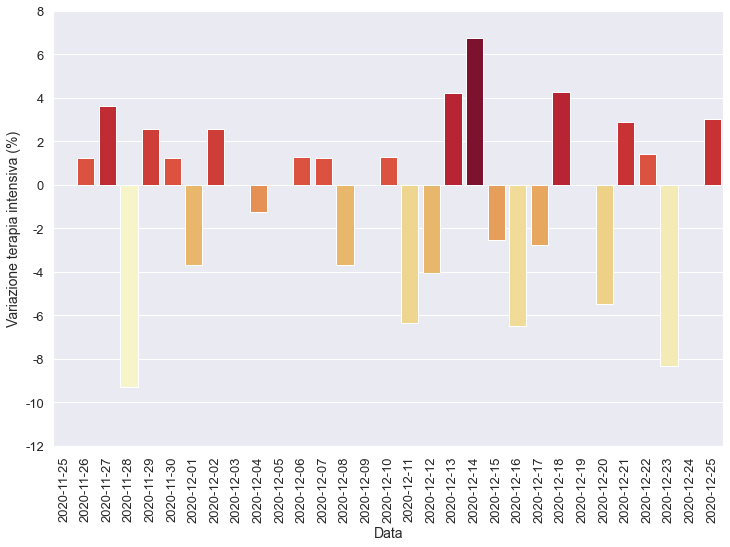

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

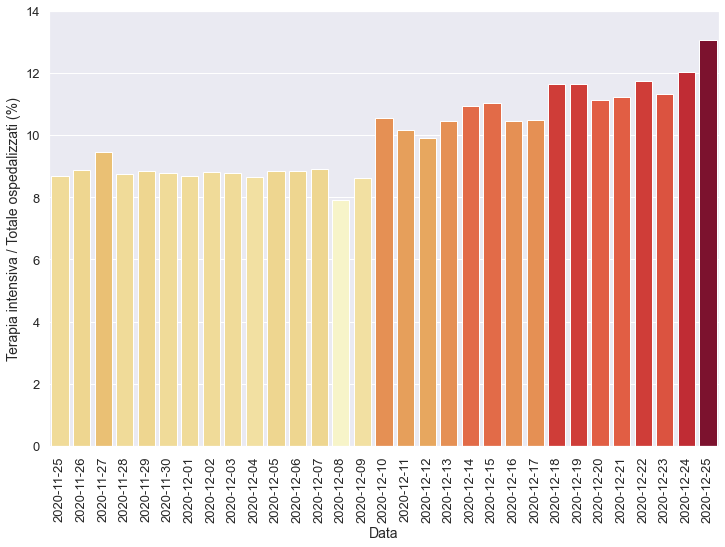

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

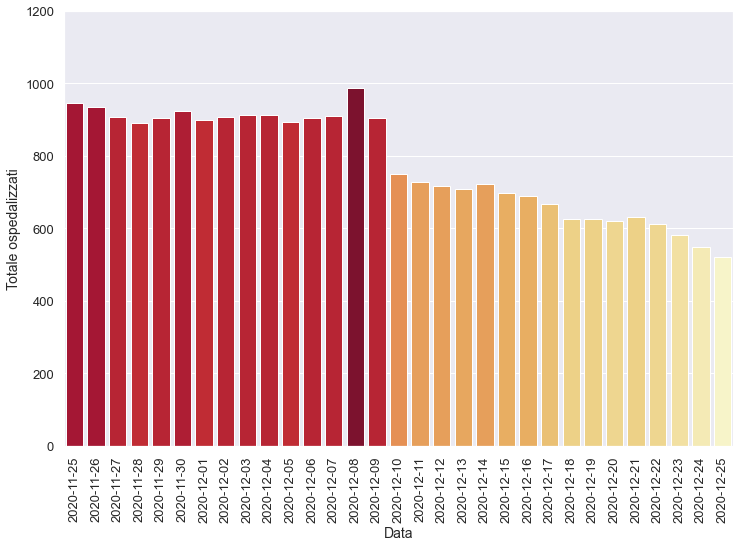

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

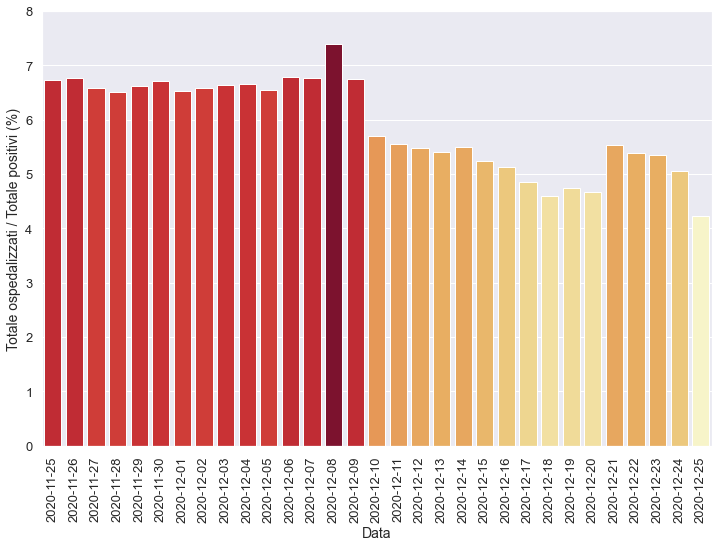

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

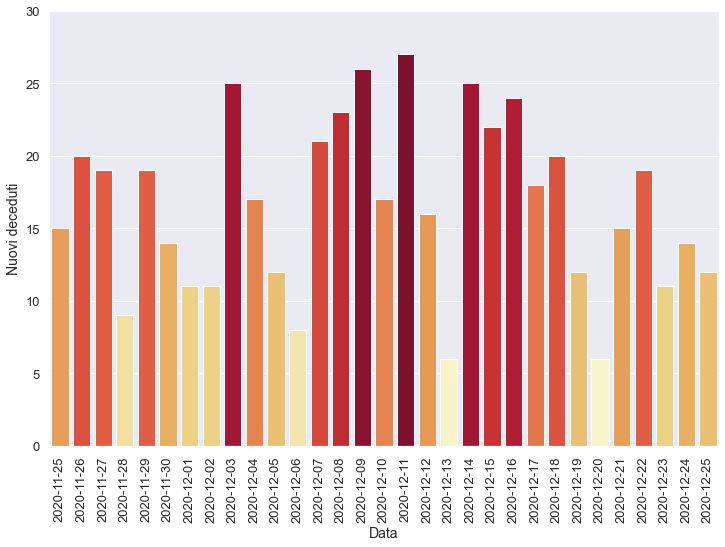

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

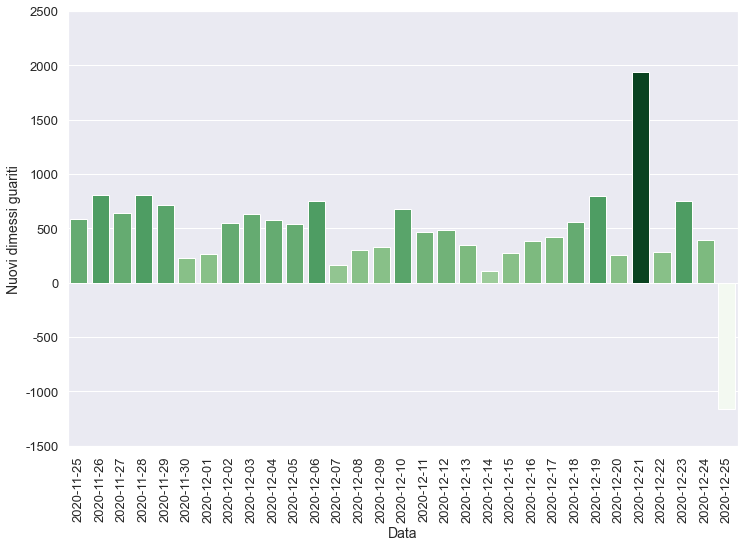

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-18T17:00:00,4,Trentino-Alto Adige,553,73,626,12977,13603,-160,420,...,20.0,4469.0,885.0,-118.0,11.66,4.60,9.40,47.46,4.29,-1.16
1,2020-12-19T17:00:00,4,Trentino-Alto Adige,553,73,626,12547,13173,-430,378,...,12.0,5509.0,1059.0,-430.0,11.66,4.75,6.86,35.69,0.00,-3.16
2,2020-12-20T17:00:00,4,Trentino-Alto Adige,551,69,620,12646,13266,93,354,...,6.0,3377.0,741.0,99.0,11.13,4.67,10.48,47.77,-5.48,0.71
3,2020-12-21T17:00:00,4,Trentino-Alto Adige,561,71,632,10787,11419,-1847,102,...,15.0,1717.0,401.0,-1859.0,11.23,5.53,5.94,25.44,2.90,-13.92
4,2020-12-22T17:00:00,4,Trentino-Alto Adige,540,72,612,10746,11358,-61,238,...,19.0,2353.0,652.0,-41.0,11.76,5.39,10.11,36.50,1.41,-0.53
5,2020-12-23T17:00:00,4,Trentino-Alto Adige,516,66,582,10298,10880,-478,288,...,11.0,5587.0,1112.0,-448.0,11.34,5.35,5.15,25.90,-8.33,-4.21
6,2020-12-24T17:00:00,4,Trentino-Alto Adige,483,66,549,10304,10853,-27,380,...,14.0,4451.0,905.0,6.0,12.02,5.06,8.54,41.99,0.00,-0.25
7,2020-12-25T17:00:00,4,Trentino-Alto Adige,453,68,521,11820,12341,1488,336,...,12.0,5001.0,1748.0,1516.0,13.05,4.22,6.72,19.22,3.03,13.71


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

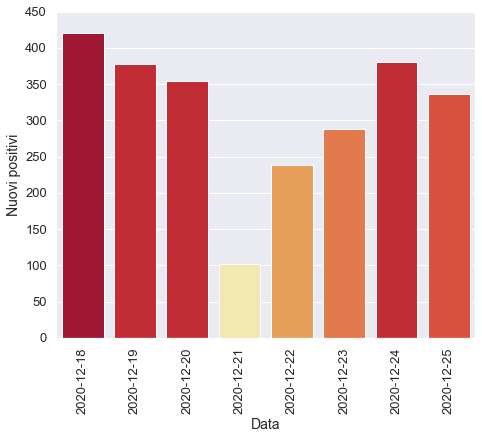

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

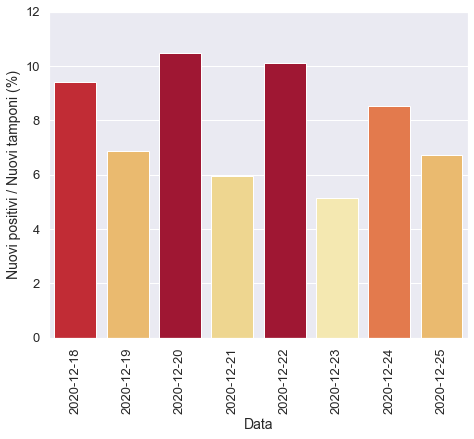

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

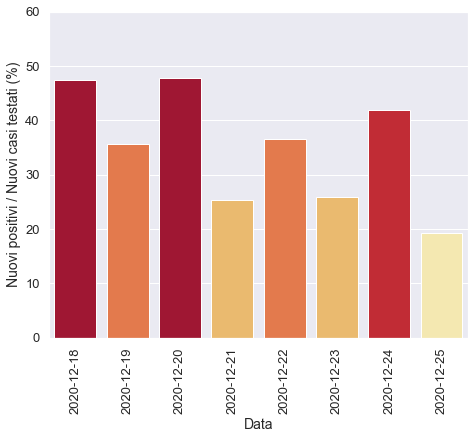

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

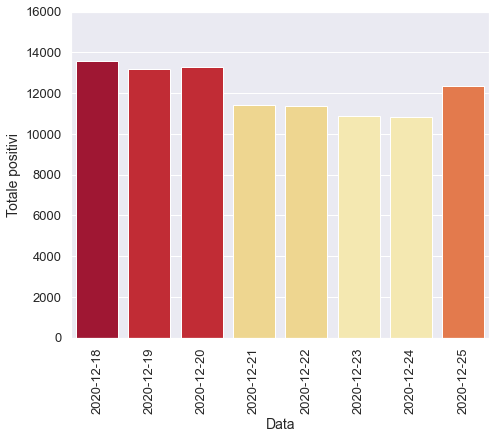

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

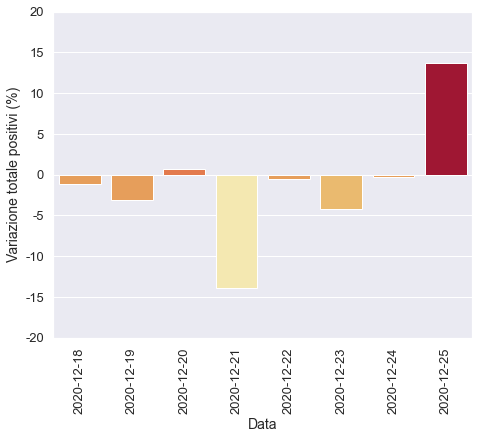

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

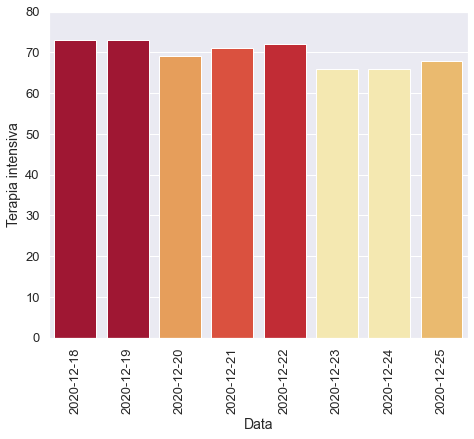

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

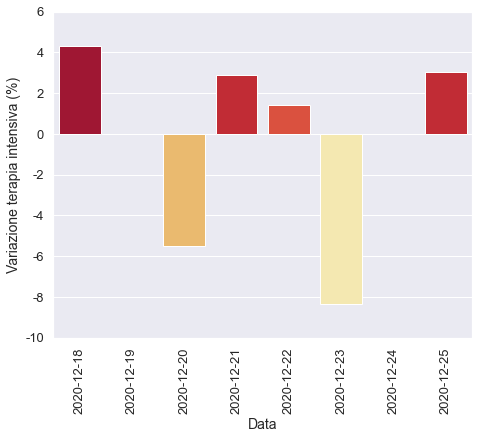

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

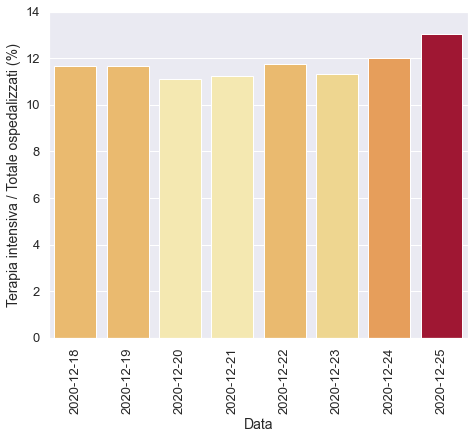

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

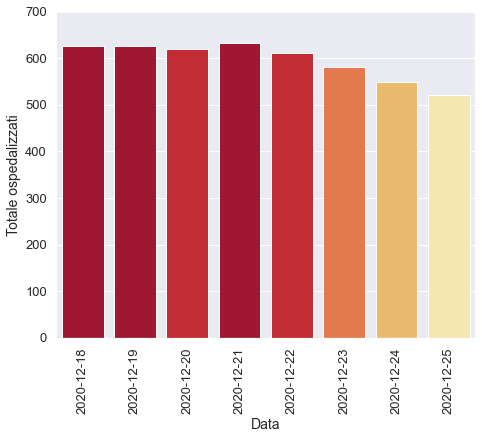

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

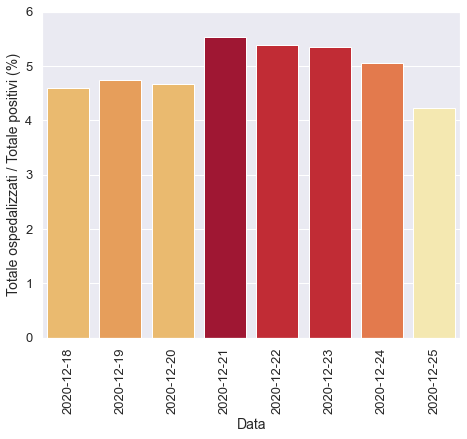

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

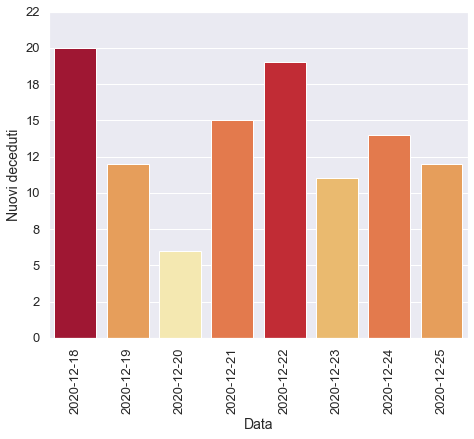

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

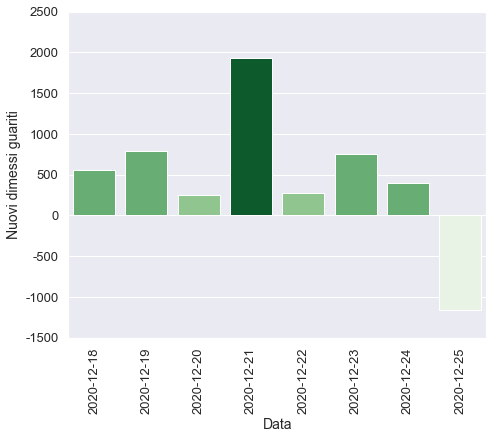

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)